# Introduction to Pandas

* Object Creation
* Viewing data
* Selection
* Missing data
* Grouping
* Reshaping
* Time series
* Plotting
* i/o

# Plan

1. read csv file with titanic data
2. explore 
3. some plotting
4. missing values



In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('../data/titanic.csv')
df.shape

(891, 12)

In [9]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.7500,NaN,Q


# select rows, columns

In [12]:
# select rows => use loc
df.loc[10:11]
# df[0:5]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.70,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S


In [34]:
# print(df.columns)
# df.Name
# df[ ['PassengerId', 'Survived'] ] 

In [54]:
# Passengers who survived
# df[ some boolean condition ]

cond = (df.Survived == 1)

print(df[ cond][ ['Age', 'Fare'] ].shape)

print(df[~cond][ ['Age', 'Fare'] ].shape)
print(df[df.Survived == 0][ ['Age', 'Fare'] ].shape)


(342, 2)
(549, 2)
(549, 2)


In [16]:
# More efficient exploration

In [78]:
df = pd.read_csv('../data/titanic.csv')

print(df.shape)

df.Age.value_counts(dropna=False)


(891, 12)


NaN       177
 24.00     30
 22.00     27
 18.00     26
 30.00     25
 19.00     25
 28.00     25
 21.00     24
 25.00     23
 36.00     22
 29.00     20
 35.00     18
 32.00     18
 26.00     18
 27.00     18
 16.00     17
 31.00     17
 23.00     15
 33.00     15
 34.00     15
 20.00     15
 39.00     14
 17.00     13
 40.00     13
 42.00     13
 45.00     12
 38.00     11
 4.00      10
 50.00     10
 2.00      10
         ... 
 57.00      2
 45.50      2
 40.50      2
 32.50      2
 30.50      2
 10.00      2
 59.00      2
 0.83       2
 63.00      2
 70.00      2
 0.75       2
 64.00      2
 71.00      2
 55.00      2
 55.50      1
 12.00      1
 14.50      1
 34.50      1
 0.92       1
 24.50      1
 23.50      1
 20.50      1
 0.42       1
 80.00      1
 74.00      1
 70.50      1
 66.00      1
 36.50      1
 53.00      1
 0.67       1
Name: Age, dtype: int64

In [63]:

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [71]:
# Missing values

# Missing age: how many? and what to do with it

# df[df.Age.isnull()].Age

# df[df.Age.isnull()].shape

# Replace with mean of age

# 1. calculate mean of age
missing_age_condition = ~df.Age.isnull() 

age_average = df[ missing_age_condition ]['Age'].mean()
age_average
# 2. replace null values with average age 
df.loc[ df.Age.isnull(),'Age'] = age_average

# 3. No more missing values



In [72]:
df[df.Age.isnull()].shape

(0, 12)

In [79]:
# Reload data
df = pd.read_csv('../data/titanic.csv')
print(df.shape)

# Drop the rows with missing values
df = df.dropna(subset = ['Age'])
print(df.shape)

df.to_csv('titanic_with_age.csv')


(891, 12)
(714, 12)


# Plotting




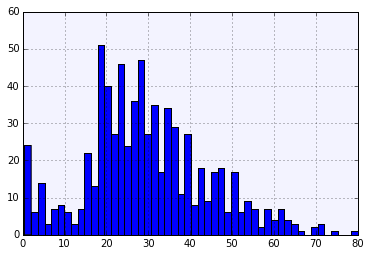

In [81]:
# Histogram of fares
# Scatterplot of Age vs Fare
import matplotlib.pyplot as plt
%matplotlib inline

df.Age.hist(bins = 50)

/Users/aperrier/anaconda/envs/py34/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


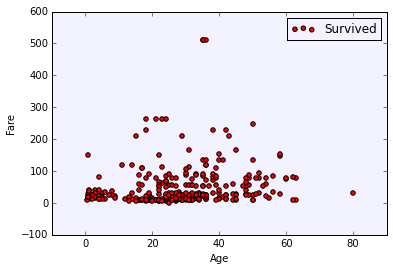

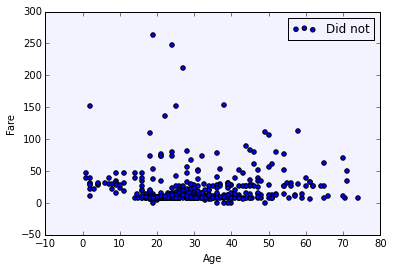

In [84]:
plt.figure()

df[df.Survived==1].plot.scatter(x='Age', y='Fare',color ='r', label ='Survived')
df[df.Survived==0].plot.scatter(x='Age', y='Fare',color ='b', label ='Did not')


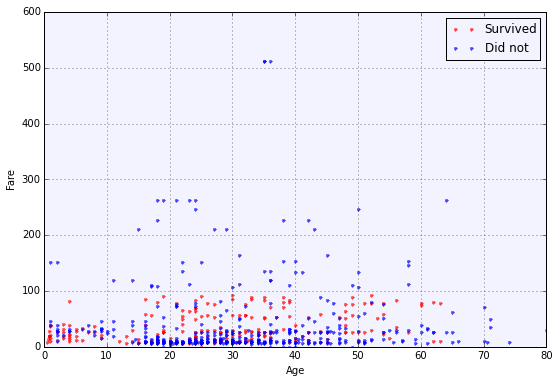

In [87]:
cond = (df.Survived == 1) & (df.Fare < 100) 
fig = plt.figure(figsize=(9,6))
plt.plot( df[cond].Age, df[cond].Fare,'.'  , color='r', alpha = 0.7, label ='Survived')
plt.plot( df[~cond].Age, df[~cond].Fare,'.'  , color='b', alpha = 0.7, label ='Did not')
plt.legend(loc='best')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid()
plt.show()


In [64]:
df[cond].Fare.describe()

count    558.000000
mean      19.540575
std       18.579812
min        0.000000
25%        7.854200
50%       10.500000
75%       26.362500
max       91.079200
Name: Fare, dtype: float64

# More visualization examples

http://pandas.pydata.org/pandas-docs/stable/visualization.html